In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose,you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’,you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.

## 1.1) Read the dataset. Do the descriptive statistics and do null value condition check.

In [2]:
df = pd.read_csv('Transport.csv')
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,444.0,NaN,NaN,NaN,27.747748,4.41671,18.0,25.0,27.0,30.0,43.0
Gender,444,2,Male,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,444.0,NaN,NaN,NaN,0.754505,0.430866,0.0,1.0,1.0,1.0,1.0
MBA,444.0,NaN,NaN,NaN,0.252252,0.434795,0.0,0.0,0.0,1.0,1.0
Work Exp,444.0,NaN,NaN,NaN,6.29955,5.112098,0.0,3.0,5.0,8.0,24.0
Salary,444.0,NaN,NaN,NaN,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,NaN,NaN,NaN,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,NaN,NaN,NaN,0.234234,0.423997,0.0,0.0,0.0,0.0,1.0
Transport,444,2,Public Transport,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Minimum age is 18 year while maximum is 43 year. Average age is 27 year
2. minimum work experience is 0 year while maximum is 24 year with average of 6 year
3. Average salary is 16.23 with range of 6.5 to 57. 
4. Average distance is 11.32 with range of 3.2 to 23.4.
5. more then 75% samples failed to persue license while only 25% succeded for the license.

## 1.2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (5 pts). Interpret the inferences for each (3 pts)

In [4]:
df.duplicated().sum()

0

No duplicate value present in data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


No null value present in data
1. Age, Engineer, MBA, Work Exp, License, Gender and transport is cataogory
2. Salary and Distance is numerical values

In [6]:
df_num = df.select_dtypes(include = 'float64')

### Check for outliers for numeric column

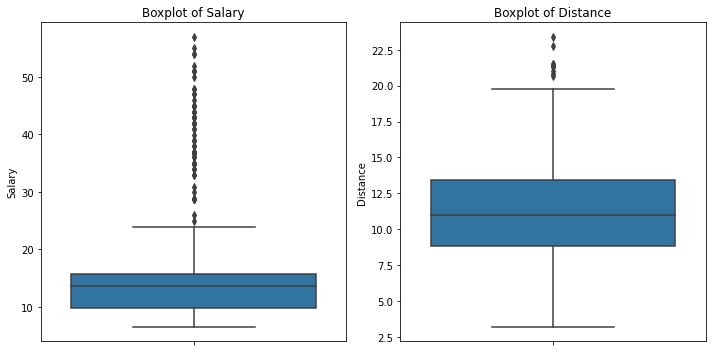

In [7]:
plt.figure(figsize = (10,5))
numeric = ['Salary', 'Distance']
for i in range(2):
  plt.subplot(1, 2, i+1)
  sns.boxplot(y = numeric[i], data  = df_num)
  plt.title('Boxplot of '+numeric[i])
  plt.tight_layout()

Outliers present in both numeric colums which is Salary and Distance

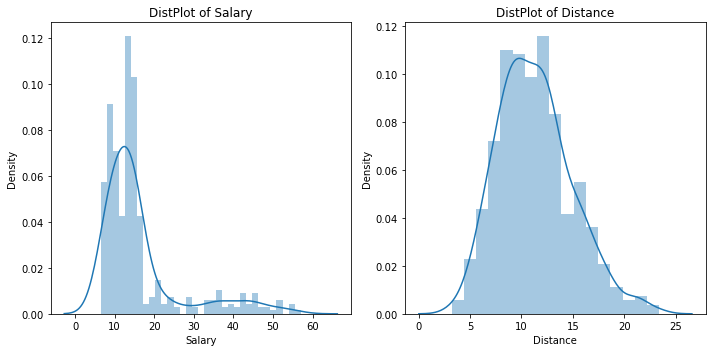

In [8]:
plt.figure(figsize = (10,5))
numeric = ['Salary', 'Distance']
for i in range(2):
  plt.subplot(1, 2, i+1)
  sns.distplot(df_num[numeric[i]])
  plt.title('DistPlot of '+numeric[i])
  plt.tight_layout()

In [9]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()/df_num.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Salary,13.29
Distance,2.03


In [10]:
df_cat = df.select_dtypes(include = ['object','int64'])

In [11]:
df_cat.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'license', 'Transport'], dtype='object')

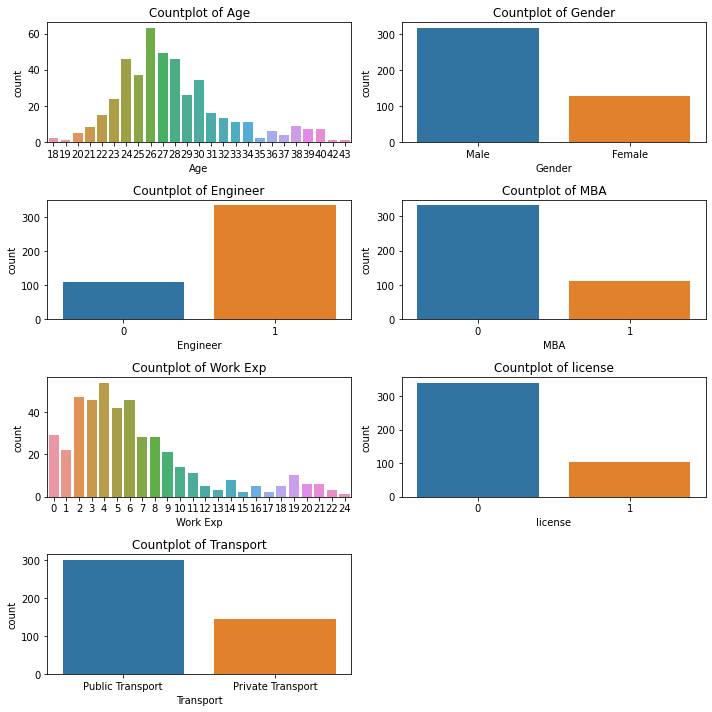

In [12]:
plt.figure(figsize = (10,10))
cats = ['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'license', 'Transport']
for i in range(7):
  plt.subplot(4, 2, i+1)
  sns.countplot(x = cats[i], data  = df_cat)
  plt.title('Countplot of '+cats[i])
  plt.tight_layout()

### Check pairwise distribution of the continuous variables(pair plot for continues column)

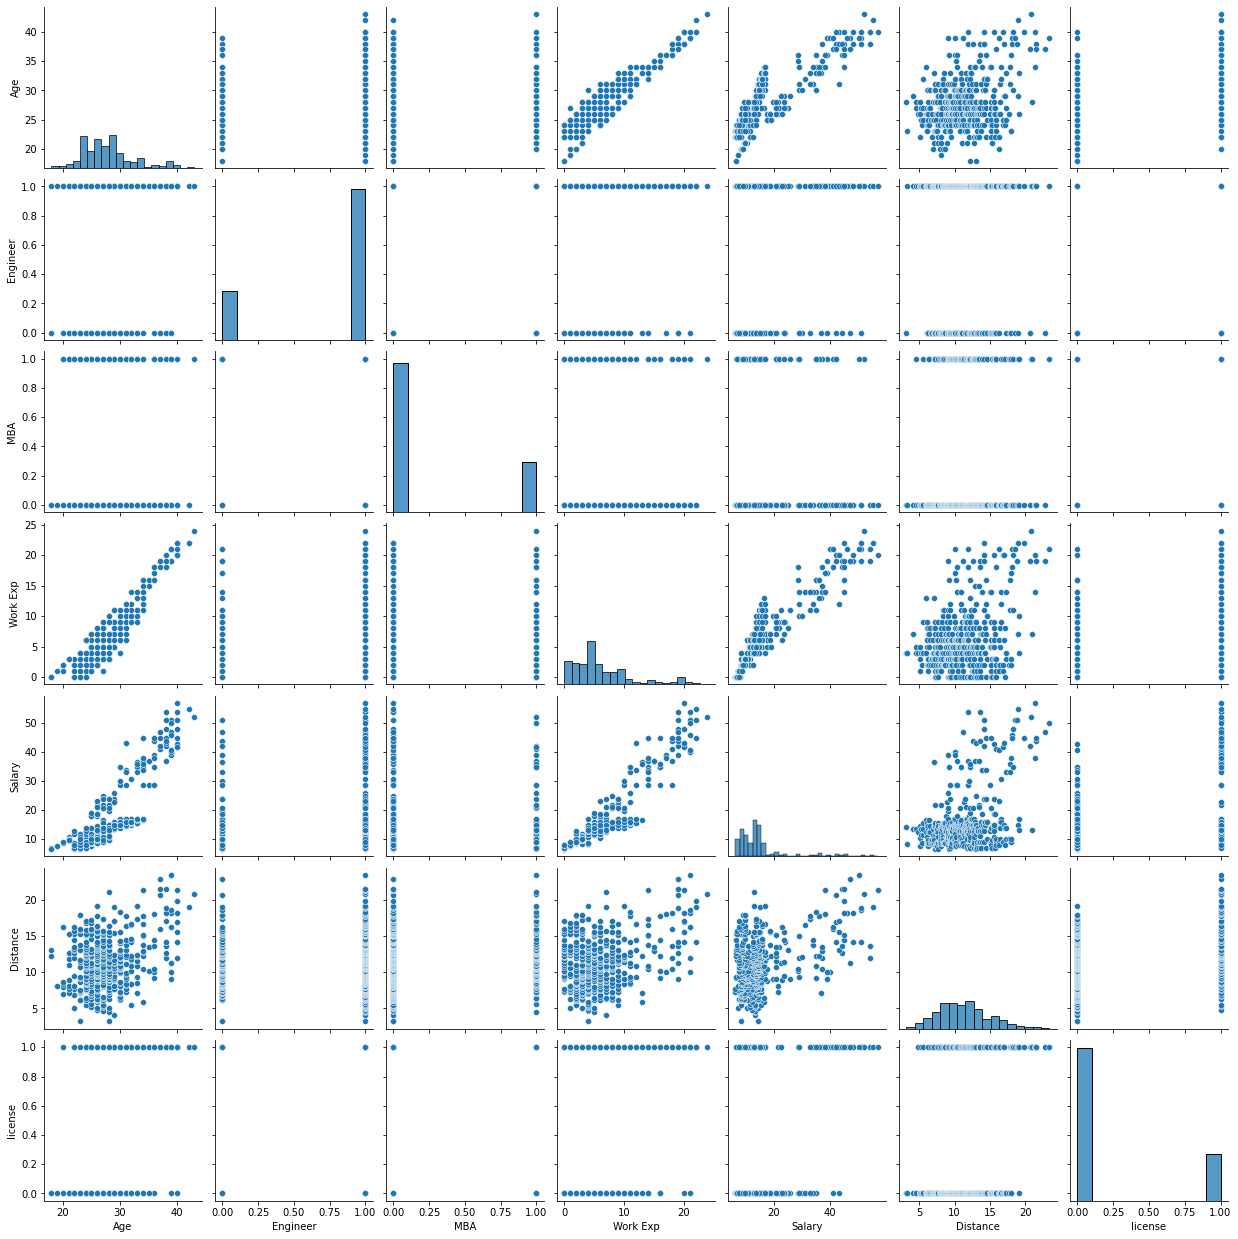

In [13]:
sns.pairplot(df)

### Check for Correlation

<AxesSubplot:>

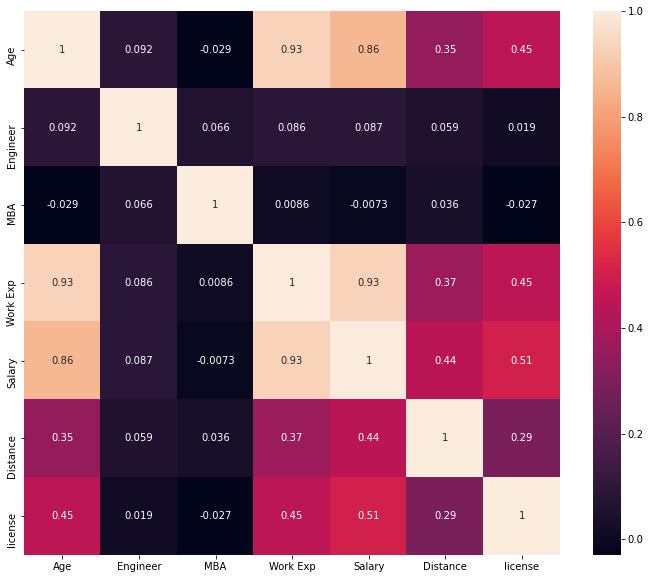

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

There are mostly positive correlations between variables, and very few negative correlations.
Overall the magnitude of correlations between the variables are very less except Work Exp, Salary and Distance.

### 1.3) Encode the data (having string values) for Modelling(2 pts). Is Scaling necessary here or not?(2 pts), Data Split: Split the data into train and test (70:30) (2 pts).

### Convert all objects to categorical codes

In [15]:
#df_cat[''] = pd.get_dummies(df_cat, drop_first = True)
df_cat.head()

,Age,Gender,Engineer,MBA,Work Exp,license,Transport
0,28,Male,0,0,4,0,Public Transport
1,23,Female,1,0,4,0,Public Transport
2,29,Male,1,0,7,0,Public Transport
3,28,Female,1,1,5,0,Public Transport
4,27,Male,1,0,4,0,Public Transport


In [16]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[1 0]


feature: Transport
['Public Transport', 'Private Transport']
Categories (2, object): ['Private Transport', 'Public Transport']
[1 0]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    int8   
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    int8   
dtypes: float64(2), int64(5), int8(2)
memory usage: 25.3 KB


### Extract the target column into separate vectors for training set and test set

In [18]:
X = df.drop("Transport", axis=1)
y = df["Transport"]
X.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,28,1,0,0,4,14.3,3.2,0
1,23,0,1,0,4,8.3,3.3,0
2,29,1,1,0,7,13.4,4.1,0
3,28,0,1,1,5,13.4,4.5,0
4,27,1,1,0,4,13.4,4.6,0


### Split data into training and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### Check the dimensions of the training and test data

In [20]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (310, 8)
X_test (134, 8)
y_train (310,)
y_test (134,)


### Scaling

We need to do scaling before using distance based models as unit of colums are diffrent and it may impact on vaitage of another column. Standard Scaling , or Min-Max scaling either one of these can used

In [21]:
sc=StandardScaler()

In [22]:
X_train_sc= pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [23]:
X_train_sc.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,310.0,2.435328e-17,1.001617,-2.241597,-0.624488,-0.162456,0.530591,3.533795
Gender,310.0,7.664120e-17,1.001617,-1.515873,-1.515873,0.659686,0.659686,0.659686
Engineer,310.0,2.120168e-16,1.001617,-1.709986,-1.709986,0.584800,0.584800,0.584800
MBA,310.0,1.536405e-16,1.001617,-0.594737,-0.594737,-0.594737,1.681416,1.681416
Work Exp,310.0,8.487834e-17,1.001617,-1.234252,-0.640739,-0.245063,0.348450,3.513853
Salary,310.0,-1.031433e-16,1.001617,-0.931419,-0.614597,-0.249772,-0.040958,3.628897
Distance,310.0,3.767596e-16,1.001617,-2.213921,-0.681906,-0.107400,0.624411,3.312277
license,310.0,3.223228e-18,1.001617,-0.530087,-0.530087,-0.530087,-0.530087,1.886484


In [24]:
X_test_sc.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,134.0,0.034080,1.065827,-2.241597,-0.624488,-0.162456,0.530591,3.302779
Gender,134.0,0.107678,0.950237,-1.515873,-0.971984,0.659686,0.659686,0.659686
Engineer,134.0,0.071042,0.960155,-1.709986,0.584800,0.584800,0.584800,0.584800
MBA,134.0,-0.068164,0.963436,-0.594737,-0.594737,-0.594737,-0.594737,1.681416
Work Exp,134.0,0.039882,1.036834,-1.234252,-0.640739,-0.245063,0.348450,3.118177
Salary,134.0,0.011810,1.012023,-0.902617,-0.604997,-0.240171,-0.057759,3.916917
Distance,134.0,0.027754,0.954179,-1.830917,-0.716103,0.015708,0.508142,2.792486
license,134.0,0.119141,1.075191,-0.530087,-0.530087,-0.530087,1.886484,1.886484


## 1.4) Apply Logistic Regression(4 pts). Interpret the inferences of both model s (2 pts)

In [25]:
LM = LogisticRegression(random_state=100)

In [26]:
LM.fit(X_train_sc, y_train)

LogisticRegression(random_state=100)

In [27]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,LM.predict(X_train_sc))))
print("Test Accuracy is : {}".format(accuracy_score(y_test,LM.predict(X_test_sc))))

Train Accuracy is : 0.8032258064516129
Test Accuracy is : 0.8134328358208955


### GridSearchCV

In [28]:
params = {'penalty' : ['l1','l2','elasticnet'], 
           'C': np.logspace(-3,3,7),
           'solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [29]:
TLM = GridSearchCV(estimator = LogisticRegression(), param_grid = params,scoring='accuracy', cv = 5)
TLM.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [30]:
TLM.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [31]:
TLM.best_score_

0.7967741935483871

In [32]:
TLM = TLM.best_estimator_

In [33]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,TLM.predict(X_train_sc))))
print("Test Accuracy is : {}".format(accuracy_score(y_test,TLM.predict(X_test_sc))))

Train Accuracy is : 0.8225806451612904
Test Accuracy is : 0.8283582089552238


## 1.5) Apply KNN Model(4 pts). Interpret the inferences of each model (2 pts)

### Find best nearest neighbors value for KNN

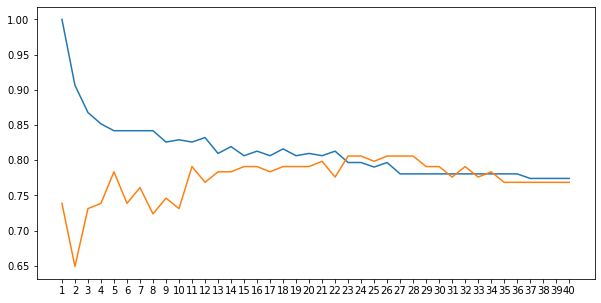

In [34]:
perf_train = []
perf_test = []
for i in range(1,41):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train_sc, y_train)
  perf_train.append(model.score(X_train_sc, y_train))
  perf_test.append(model.score(X_test_sc, y_test))
  
plt.figure(figsize = (10,5))
plt.plot(range(1,41), perf_train)
plt.plot(range(1,41), perf_test)
plt.xticks([x for x in range(1,41)]);

In [35]:
np.argmin(np.array(perf_train) - np.array(perf_test))

26

Best neighbors value is 26. applying it to create model

In [36]:
KNN = KNeighborsClassifier(n_neighbors = 26)

In [37]:
KNN.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=26)

In [38]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,KNN.predict(X_train_sc))))
print("Test Accuracy is : {}".format(accuracy_score(y_test,KNN.predict(X_test_sc))))

Train Accuracy is : 0.7967741935483871
Test Accuracy is : 0.8059701492537313


### GridSearchCV

In [39]:
params = {'n_neighbors': [7,15,17,19,21,31],
          'leaf_size': [10, 30, 40,50],
          'p': [1,2,3,4]}

In [40]:
TKNN = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, cv = 5)
TKNN.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 30, 40, 50],
                         'n_neighbors': [7, 15, 17, 19, 21, 31],
                         'p': [1, 2, 3, 4]})

In [41]:
TKNN.best_params_

{'leaf_size': 10, 'n_neighbors': 15, 'p': 3}

In [43]:
TKNN = TKNN.best_estimator_

In [44]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,TKNN.predict(X_train_sc))))
print("Test Accuracy is : {}".format(accuracy_score(y_test,TKNN.predict(X_test_sc))))

Train Accuracy is : 0.8193548387096774
Test Accuracy is : 0.7910447761194029


After applying GridSearchCV on KNeighborsClassifier() we can see that 10 leaf size, 15 neighnors and Power parameter for the Minkowski metric should be 3 for best model which generate accuracy score of 81.9% for training as well as 79.1% for training data samples 

## 1.6) Bagging ( 4 pts) and Boosting (4 pts), Model Tuning (4 pts).

### Boosting Classifier

In [45]:
GBM= GradientBoostingClassifier(random_state = 100)
GBM.fit(X_train,y_train)

GradientBoostingClassifier(random_state=100)

In [72]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,GBM.predict(X_train))))

print("Test Accuracy is : {}".format(accuracy_score(y_test,GBM.predict(X_test))))

Train Accuracy is : 0.967741935483871
Test Accuracy is : 0.7686567164179104


### Bagging Classifier

In [47]:
BGM= BaggingClassifier(random_state= 100)
BGM.fit(X_train,y_train)

BaggingClassifier(random_state=100)

In [71]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,BGM.predict(X_train))))
print("Test Accuracy is : {}".format(accuracy_score(y_test,BGM.predict(X_test))))

Train Accuracy is : 0.9838709677419355
Test Accuracy is : 0.7910447761194029


### Model tuning

In [49]:
param_gbc={'learning_rate': [0.05,0.075, 0.095], 'max_depth':[6,7,8],
            'min_samples_split': [10,11,12], 'n_estimators':[30,50,100],'random_state': [100]}    

In [50]:
TGBM=GridSearchCV(GradientBoostingClassifier(),param_grid=param_gbc,refit=True,verbose=True,n_jobs=-1, cv = 10)
TGBM.fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.075, 0.095],
                         'max_depth': [6, 7, 8],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [30, 50, 100], 'random_state': [100]},
             verbose=True)

In [51]:
TGBM.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_samples_split': 10,
 'n_estimators': 30,
 'random_state': 100}

In [52]:
TGBM = TGBM.best_estimator_

In [53]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,TGBM.predict(X_train))))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test,TGBM.predict(X_test))))

Train Accuracy is : 0.9354838709677419

Test Accuracy is : 0.8432835820895522


In [54]:
param_bag={'base_estimator':[LogisticRegression(),DecisionTreeClassifier()],'max_samples':[0.3,0.5,0.6,0.7,0.8],'max_features':[0.3,0.4,0.5,0.6],
    'n_estimators' :[30,40,50,100,150],'random_state': [100]}

In [55]:
TBGM=GridSearchCV(BaggingClassifier(),param_grid=param_bag,refit=True,verbose=True,n_jobs=-1, cv = 10)
TBGM.fit(X_train,y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=10, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [LogisticRegression(),
                                            DecisionTreeClassifier()],
                         'max_features': [0.3, 0.4, 0.5, 0.6],
                         'max_samples': [0.3, 0.5, 0.6, 0.7, 0.8],
                         'n_estimators': [30, 40, 50, 100, 150],
                         'random_state': [100]},
             verbose=True)

In [56]:
TBGM.best_params_

{'base_estimator': DecisionTreeClassifier(),
 'max_features': 0.5,
 'max_samples': 0.6,
 'n_estimators': 50,
 'random_state': 100}

In [57]:
TBGM = TBGM.best_estimator_

In [58]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,TBGM.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,TBGM.predict(X_test))))


Train Accuracy is : 0.9612903225806452

Test Accuracy is : 0.7835820895522388


## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (5 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized (3 pts)

In [79]:
probs_LM = LM.predict_proba(X_test_sc)
probs_LM = probs_LM[:, 1]
LM_train_auc = roc_auc_score(y_test, probs_LM)

probs_TLM = TLM.predict_proba(X_test_sc)
probs_TLM = probs_TLM[:, 1]
TLM_train_auc = roc_auc_score(y_test, probs_TLM)

probs_KNN = KNN.predict_proba(X_test_sc)
probs_KNN = probs_KNN[:, 1]
KNN_train_auc = roc_auc_score(y_test, probs_KNN)

probs_TKNN = TKNN.predict_proba(X_test_sc)
probs_TKNN = probs_TKNN[:, 1]
TKNN_train_auc = roc_auc_score(y_test, probs_TKNN)

probs_GBM = GBM.predict_proba(X_test)
probs_GBM = probs_GBM[:, 1]
GBM_train_auc = roc_auc_score(y_test, probs_GBM)

probs_TGBM = TGBM.predict_proba(X_test)
probs_TGBM = probs_TGBM[:, 1]
TGBM_train_auc = roc_auc_score(y_test, probs_TGBM)

probs_BGM = BGM.predict_proba(X_test)
probs_BGM = probs_BGM[:, 1]
BGM_train_auc = roc_auc_score(y_test, probs_BGM)

probs_TBGM = TBGM.predict_proba(X_test)
probs_TBGM = probs_TBGM[:, 1]
TBGM_train_auc = roc_auc_score(y_test, probs_TBGM)

index=['Test Accuracy', 'Train Accuracy', 'AUC']
data = pd.DataFrame({'LogisticModel':[accuracy_score(y_test,model.predict(X_test_sc)),
                                      accuracy_score(y_train,model.predict(X_train_sc)),
                                      LM_train_auc],
                    'TunedLogisticModel':[accuracy_score(y_test,TLM.predict(X_test_sc)),
                                      accuracy_score(y_train,TLM.predict(X_train_sc)),
                                      TLM_train_auc],
                    'KNNModel':[accuracy_score(y_test,KNN.predict(X_test_sc)),
                                      accuracy_score(y_train,KNN.predict(X_train_sc)),
                                      KNN_train_auc],
                    'TunedKNNModel':[accuracy_score(y_test,TKNN.predict(X_test_sc)),
                                      accuracy_score(y_train,TKNN.predict(X_train_sc)),
                                      TKNN_train_auc],
                    'BaggingModel':[accuracy_score(y_test,BGM.predict(X_test)),
                                      accuracy_score(y_train,BGM.predict(X_train)),
                                      BGM_train_auc],
                    'TunedBaggingModel':[accuracy_score(y_test,TBGM.predict(X_test)),
                                      accuracy_score(y_train,TBGM.predict(X_train)),
                                      TBGM_train_auc],
                    'BoostingModel':[accuracy_score(y_test,GBM.predict(X_test)),
                                      accuracy_score(y_train,GBM.predict(X_train)),
                                      GBM_train_auc],
                    'TunedBoostingModel':[accuracy_score(y_test,TGBM.predict(X_test)),
                                      accuracy_score(y_train,TGBM.predict(X_train)),
                                      TGBM_train_auc]},index=index)
round(data,2)

,LogisticModel,TunedLogisticModel,KNNModel,TunedKNNModel,BaggingModel,TunedBaggingModel,BoostingModel,TunedBoostingModel
Test Accuracy,0.77,0.83,0.81,0.79,0.79,0.78,0.77,0.84
Train Accuracy,0.77,0.82,0.80,0.82,0.98,0.96,0.97,0.94
AUC,0.82,0.82,0.79,0.78,0.82,0.84,0.81,0.84


In [73]:
print('Logistic Regression Model')
print(metrics.classification_report(y_test,LM.predict(X_test_sc)),'\n')
print('Tuned Logistic Regression Model')
print(metrics.classification_report(y_test,TLM.predict(X_test_sc)),'\n')
print('KNN Model')
print(metrics.classification_report(y_test,KNN.predict(X_test_sc)),'\n')
print('Tuned KNN Model')
print(metrics.classification_report(y_test,TKNN.predict(X_test_sc)),'\n')
print('Bagging Model')
print(metrics.classification_report(y_test,BGM.predict(X_test)),'\n')
print('Tuned Bagging Model')
print(metrics.classification_report(y_test,TBGM.predict(X_test)),'\n')
print('Boosting Model')
print(metrics.classification_report(y_test,GBM.predict(X_test)),'\n')
print('Tuned Boosting Model')
print(metrics.classification_report(y_test,TGBM.predict(X_test)),'\n')

Logistic Regression Model
              precision    recall  f1-score   support

           0       0.76      0.60      0.67        42
           1       0.83      0.91      0.87        92

    accuracy                           0.81       134
   macro avg       0.79      0.75      0.77       134
weighted avg       0.81      0.81      0.81       134
 

Tuned Logistic Regression Model
              precision    recall  f1-score   support

           0       0.81      0.60      0.68        42
           1       0.83      0.93      0.88        92

    accuracy                           0.83       134
   macro avg       0.82      0.77      0.78       134
weighted avg       0.83      0.83      0.82       134
 

KNN Model
              precision    recall  f1-score   support

           0       0.94      0.40      0.57        42
           1       0.78      0.99      0.87        92

    accuracy                           0.81       134
   macro avg       0.86      0.70      0.72       134
we

In [78]:
print('Logistic Regression Model')
print(metrics.classification_report(y_train,LM.predict(X_train_sc)),'\n')
print('Tuned Logistic Regression Model')
print(metrics.classification_report(y_train,TLM.predict(X_train_sc)),'\n')
print('KNN Model')
print(metrics.classification_report(y_train,KNN.predict(X_train_sc)),'\n')
print('Tuned KNN Model')
print(metrics.classification_report(y_train,TKNN.predict(X_train_sc)),'\n')
print('Bagging Model')
print(metrics.classification_report(y_train,BGM.predict(X_train)),'\n')
print('Tuned Bagging Model')
print(metrics.classification_report(y_train,TBGM.predict(X_train)),'\n')
print('Boosting Model')
print(metrics.classification_report(y_train,GBM.predict(X_train)),'\n')
print('Tuned Boosting Model')
print(metrics.classification_report(y_train,TGBM.predict(X_train)),'\n')

Logistic Regression Model
              precision    recall  f1-score   support

           0       0.77      0.57      0.66       102
           1       0.81      0.92      0.86       208

    accuracy                           0.80       310
   macro avg       0.79      0.74      0.76       310
weighted avg       0.80      0.80      0.79       310
 

Tuned Logistic Regression Model
              precision    recall  f1-score   support

           0       0.86      0.55      0.67       102
           1       0.81      0.96      0.88       208

    accuracy                           0.82       310
   macro avg       0.84      0.75      0.77       310
weighted avg       0.83      0.82      0.81       310
 

KNN Model
              precision    recall  f1-score   support

           0       0.91      0.42      0.58       102
           1       0.78      0.98      0.87       208

    accuracy                           0.80       310
   macro avg       0.85      0.70      0.72       310
we

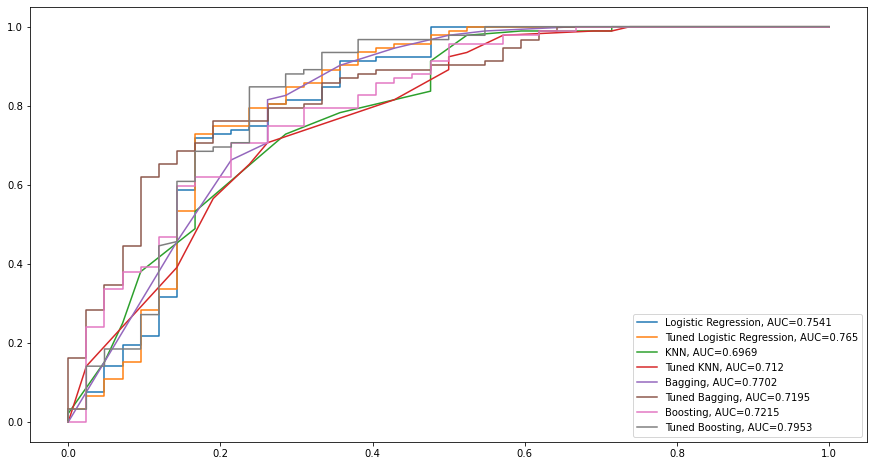

In [110]:
plt.figure(figsize = (15,8))

# # calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_LM)
auc = round(metrics.roc_auc_score(y_test, LM.predict(X_test_sc)), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.legend()

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_TLM)
auc = round(metrics.roc_auc_score(y_test, TLM.predict(X_test_sc)), 4)
plt.plot(fpr,tpr,label="Tuned Logistic Regression, AUC="+str(auc))
plt.legend()

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_KNN)
auc = round(metrics.roc_auc_score(y_test, KNN.predict(X_test_sc)), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))
plt.legend()

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_TKNN)
auc = round(metrics.roc_auc_score(y_test, TKNN.predict(X_test_sc)), 4)
plt.plot(fpr,tpr,label="Tuned KNN, AUC="+str(auc))
plt.legend()

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_BGM)
auc = round(metrics.roc_auc_score(y_test, BGM.predict(X_test)), 4)
plt.plot(fpr,tpr,label="Bagging, AUC="+str(auc))
plt.legend()

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_TBGM)
auc = round(metrics.roc_auc_score(y_test, TBGM.predict(X_test)), 4)
plt.plot(fpr,tpr,label="Tuned Bagging, AUC="+str(auc))
plt.legend()

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_GBM)
auc = round(metrics.roc_auc_score(y_test, GBM.predict(X_test)), 4)
plt.plot(fpr,tpr,label="Boosting, AUC="+str(auc))
plt.legend()

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_TGBM)
auc = round(metrics.roc_auc_score(y_test, TGBM.predict(X_test)), 4)
plt.plot(fpr,tpr,label="Tuned Boosting, AUC="+str(auc))
plt.legend()

plt.show()